# 1.&nbsp; Initiating


## 1.1.&nbsp; Import Libraries

In [1]:
# Basic Library
import numpy as np
import pandas as pd
import itertools

# Scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            precision_score,
                            recall_score,
                            f1_score,
                            classification_report)

#Pre-Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler

#Models
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Random state
rs = 42

## 1.2.&nbsp; Connect to G-Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.3.&nbsp; Load Data

In [3]:
heart_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ujian Sertifikasi BNSP ADS/heart.csv')

In [4]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
heart_data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38.0,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


#2.&nbsp; EDA

## 2.1.&nbsp; Statistical Description

In [6]:
heart_data.shape

(918, 12)

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [8]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
duplicate_rows = heart_data.duplicated()
print("Jumlah baris duplikat:", duplicate_rows.sum())

Jumlah baris duplikat: 0


In [10]:
missing_values = heart_data.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)

Jumlah missing values per kolom:
 Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64


In [11]:
# Pilih hanya kolom dengan tipe data numerik
numeric_columns = heart_data.select_dtypes(include=['int', 'float']).columns

# Hitung korelasi antar fitur hanya untuk kolom bertipe numerik
corr_numeric = heart_data[numeric_columns].corr(method='pearson', min_periods=1)

# Tampilkan matriks korelasi
print("Correlation Matrix for Numeric Columns:")
corr_numeric

Correlation Matrix for Numeric Columns:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.210568,-0.062391,0.127287,-0.300843,0.196534,0.212565
RestingBP,0.210568,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.062391,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.127287,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.300843,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.196534,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.212565,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


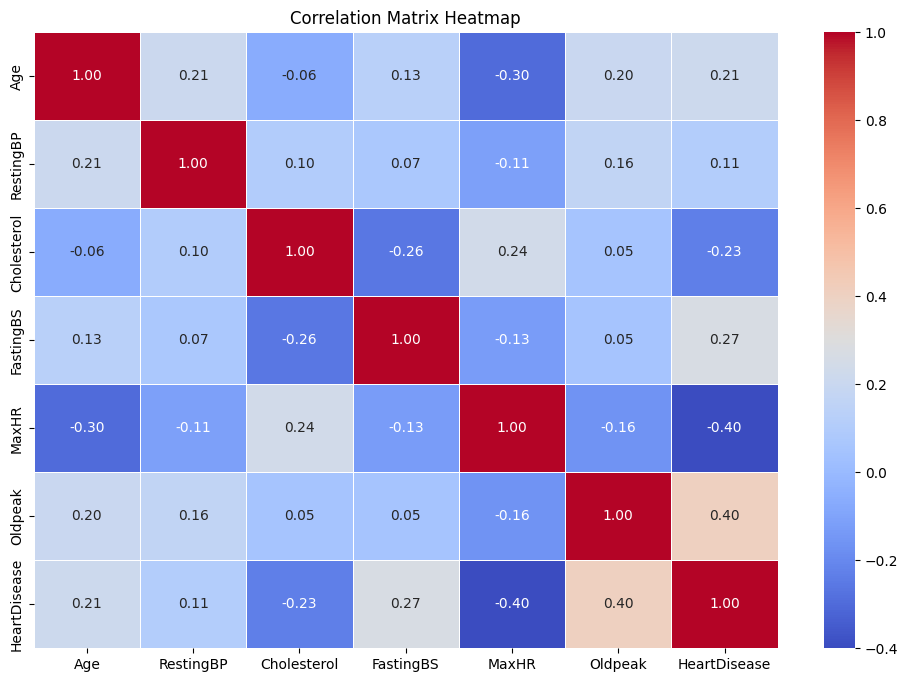

In [12]:
# Plot heatmap untuk visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_numeric, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 2.2&nbsp; Encoding of Sex

In [13]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada kolom 'Sex'
heart_data['Sex_encoded'] = label_encoder.fit_transform(heart_data['Sex'])

# Menampilkan hasil encoding
heart_data[['Sex', 'Sex_encoded']]

,Sex,Sex_encoded
0,M,1
1,F,0
2,M,1
3,F,0
4,M,1
...,...,...
913,M,1
914,M,1
915,M,1
916,F,0


In [14]:
# Menghapus kolom 'Sex' asli
heart_data.drop('Sex', axis=1, inplace=True)

In [15]:
heart_data

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_encoded
0,NaN,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49.0,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37.0,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48.0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54.0,NAP,150,195,0,Normal,122,N,0.0,Up,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,TA,110,264,0,Normal,132,N,1.2,Flat,1,1
914,68.0,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1
915,57.0,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1
916,57.0,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0


## 2.3&nbsp; Encoding of ChestPainType

In [16]:
# Melakukan One-Hot Encoding pada kolom 'ChestPainType' dengan mengonversi nilai menjadi integer
chest_pain_encoded = pd.get_dummies(heart_data['ChestPainType'], prefix='ChestPain', dtype=int)

# Menggabungkan hasil encoding dengan DataFrame asli
heart_data = pd.concat([heart_data, chest_pain_encoded], axis=1)

# Menghapus kolom 'ChestPainType' asli
heart_data.drop('ChestPainType', axis=1, inplace=True)

# Menampilkan hasil encoding
heart_data

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA
0,NaN,140,289,0,Normal,172,N,0.0,Up,0,1,0,1,0,0
1,49.0,160,180,0,Normal,156,N,1.0,Flat,1,0,0,0,1,0
2,37.0,130,283,0,ST,98,N,0.0,Up,0,1,0,1,0,0
3,48.0,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0,0,0
4,54.0,150,195,0,Normal,122,N,0.0,Up,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110,264,0,Normal,132,N,1.2,Flat,1,1,0,0,0,1
914,68.0,144,193,1,Normal,141,N,3.4,Flat,1,1,1,0,0,0
915,57.0,130,131,0,Normal,115,Y,1.2,Flat,1,1,1,0,0,0
916,57.0,130,236,0,LVH,174,N,0.0,Flat,1,0,0,1,0,0


## 2.4&nbsp; Encoding of RestingECG

In [17]:
# Melakukan One-Hot Encoding pada kolom 'RestingECG' dengan penjelasan isi
resting_ecg_encoded = pd.get_dummies(heart_data['RestingECG'], prefix='RestingECG', dtype=int)

# Menggabungkan hasil encoding dengan DataFrame asli
heart_data = pd.concat([heart_data, resting_ecg_encoded], axis=1)

# Menghapus kolom 'RestingECG' asli
heart_data.drop('RestingECG', axis=1, inplace=True)

# Menampilkan hasil encoding
heart_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,NaN,140,289,0,172,N,0.0,Up,0,1,0,1,0,0,0,1,0
1,49.0,160,180,0,156,N,1.0,Flat,1,0,0,0,1,0,0,1,0
2,37.0,130,283,0,98,N,0.0,Up,0,1,0,1,0,0,0,0,1
3,48.0,138,214,0,108,Y,1.5,Flat,1,0,1,0,0,0,0,1,0
4,54.0,150,195,0,122,N,0.0,Up,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110,264,0,132,N,1.2,Flat,1,1,0,0,0,1,0,1,0
914,68.0,144,193,1,141,N,3.4,Flat,1,1,1,0,0,0,0,1,0
915,57.0,130,131,0,115,Y,1.2,Flat,1,1,1,0,0,0,0,1,0
916,57.0,130,236,0,174,N,0.0,Flat,1,0,0,1,0,0,1,0,0


## 2.5&nbsp; Encoding of ExerciseAngina

In [18]:
heart_data['ExerciseAngina']

0      N
1      N
2      N
3      Y
4      N
      ..
913    N
914    N
915    Y
916    N
917    N
Name: ExerciseAngina, Length: 918, dtype: object

In [19]:
# Mengganti nilai 'N' dengan 0 dan 'Y' dengan 1
heart_data['ExerciseAngina_encoded'] = heart_data['ExerciseAngina'].replace({'N': 0, 'Y': 1}).astype(int)

# Menghapus kolom 'ExerciseAngina' asli
heart_data.drop('ExerciseAngina', axis=1, inplace=True)

# Menampilkan hasil encoding
heart_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded
0,NaN,140,289,0,172,0.0,Up,0,1,0,1,0,0,0,1,0,0
1,49.0,160,180,0,156,1.0,Flat,1,0,0,0,1,0,0,1,0,0
2,37.0,130,283,0,98,0.0,Up,0,1,0,1,0,0,0,0,1,0
3,48.0,138,214,0,108,1.5,Flat,1,0,1,0,0,0,0,1,0,1
4,54.0,150,195,0,122,0.0,Up,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110,264,0,132,1.2,Flat,1,1,0,0,0,1,0,1,0,0
914,68.0,144,193,1,141,3.4,Flat,1,1,1,0,0,0,0,1,0,0
915,57.0,130,131,0,115,1.2,Flat,1,1,1,0,0,0,0,1,0,1
916,57.0,130,236,0,174,0.0,Flat,1,0,0,1,0,0,1,0,0,0


## 2.6&nbsp; Encoding of ST_Slope

In [20]:
heart_data['ST_Slope']

0        Up
1      Flat
2        Up
3      Flat
4        Up
       ... 
913    Flat
914    Flat
915    Flat
916    Flat
917      Up
Name: ST_Slope, Length: 918, dtype: object

In [21]:
heart_data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [22]:
# Melakukan One-Hot Encoding pada kolom 'ST_Slope' dengan penjelasan isi dan mengonversi nilai menjadi integer
st_slope_encoded = pd.get_dummies(heart_data['ST_Slope'], prefix='ST_Slope', dtype=int)

# Menggabungkan hasil encoding dengan DataFrame asli
heart_data = pd.concat([heart_data, st_slope_encoded], axis=1)

# Menghapus kolom 'ST_Slope' asli
heart_data.drop('ST_Slope', axis=1, inplace=True)

# Menampilkan hasil encoding
heart_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,NaN,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1
1,49.0,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,37.0,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,48.0,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,1,0,1,0
4,54.0,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110,264,0,132,1.2,1,1,0,0,0,1,0,1,0,0,0,1,0
914,68.0,144,193,1,141,3.4,1,1,1,0,0,0,0,1,0,0,0,1,0
915,57.0,130,131,0,115,1.2,1,1,1,0,0,0,0,1,0,1,0,1,0
916,57.0,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [23]:
heart_data.shape

(918, 19)

## 2.7&nbsp; Adjustment Missing Value

In [24]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     911 non-null    float64
 1   RestingBP               918 non-null    int64  
 2   Cholesterol             918 non-null    int64  
 3   FastingBS               918 non-null    int64  
 4   MaxHR                   918 non-null    int64  
 5   Oldpeak                 918 non-null    float64
 6   HeartDisease            918 non-null    int64  
 7   Sex_encoded             918 non-null    int64  
 8   ChestPain_ASY           918 non-null    int64  
 9   ChestPain_ATA           918 non-null    int64  
 10  ChestPain_NAP           918 non-null    int64  
 11  ChestPain_TA            918 non-null    int64  
 12  RestingECG_LVH          918 non-null    int64  
 13  RestingECG_Normal       918 non-null    int64  
 14  RestingECG_ST           918 non-null    in

In [25]:
# Pilih hanya kolom dengan tipe data numerik
numeric_columns = heart_data.select_dtypes(include=['int', 'float']).columns

# Hitung korelasi antar fitur hanya untuk kolom bertipe numerik
corr_numeric = heart_data[numeric_columns].corr(method='pearson', min_periods=1)

# Tampilkan matriks korelasi
print("Correlation Matrix for Numeric Columns:")
corr_numeric

Correlation Matrix for Numeric Columns:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.210568,-0.062391,0.127287,-0.300843,0.196534,0.212565,0.058350,0.144186,-0.157318,-0.031271,0.011865,0.145804,-0.206854,0.107060,0.177325,0.068513,0.138620,-0.174988
RestingBP,0.210568,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.003020,0.048824,-0.046153,-0.041348,0.049855,0.053166,-0.116851,0.090447,0.155101,-0.007912,0.099207,-0.096146
Cholesterol,-0.062391,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.194308,-0.120531,0.150954,-0.006634,0.017365,0.177077,-0.038470,-0.133106,-0.034166,-0.083371,-0.050953,0.094027
FastingBS,0.127287,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.122601,0.131176,-0.140514,-0.039249,0.026885,-0.011656,-0.093028,0.127110,0.060451,0.105102,0.107006,-0.161730
MaxHR,-0.300843,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.175378,-0.354963,0.253735,0.134580,0.100025,0.125793,0.023801,-0.157879,-0.370425,-0.073316,-0.342581,0.383397
Oldpeak,0.196534,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.098522,0.280026,-0.262124,-0.106212,0.032231,0.086794,-0.116719,0.055958,0.408752,0.322130,0.283295,-0.450577
HeartDisease,0.212565,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.284825,0.516716,-0.401924,-0.212964,-0.054790,0.010670,-0.091580,0.102527,0.494282,0.122527,0.554134,-0.622164
Sex_encoded,0.058350,0.003020,-0.194308,0.122601,-0.175378,0.098522,0.284825,1.000000,0.163769,-0.137121,-0.061699,-0.010946,-0.050459,-0.021828,0.078538,0.189098,0.065201,0.101125,-0.135416
ChestPain_ASY,0.144186,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716,0.163769,1.000000,-0.522432,-0.577670,-0.249003,0.002289,-0.063606,0.076438,0.430034,0.103407,0.303645,-0.359443
ChestPain_ATA,-0.157318,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924,-0.137121,-0.522432,1.000000,-0.256767,-0.110679,-0.085791,0.107941,-0.046111,-0.300365,-0.097754,-0.304667,0.357588


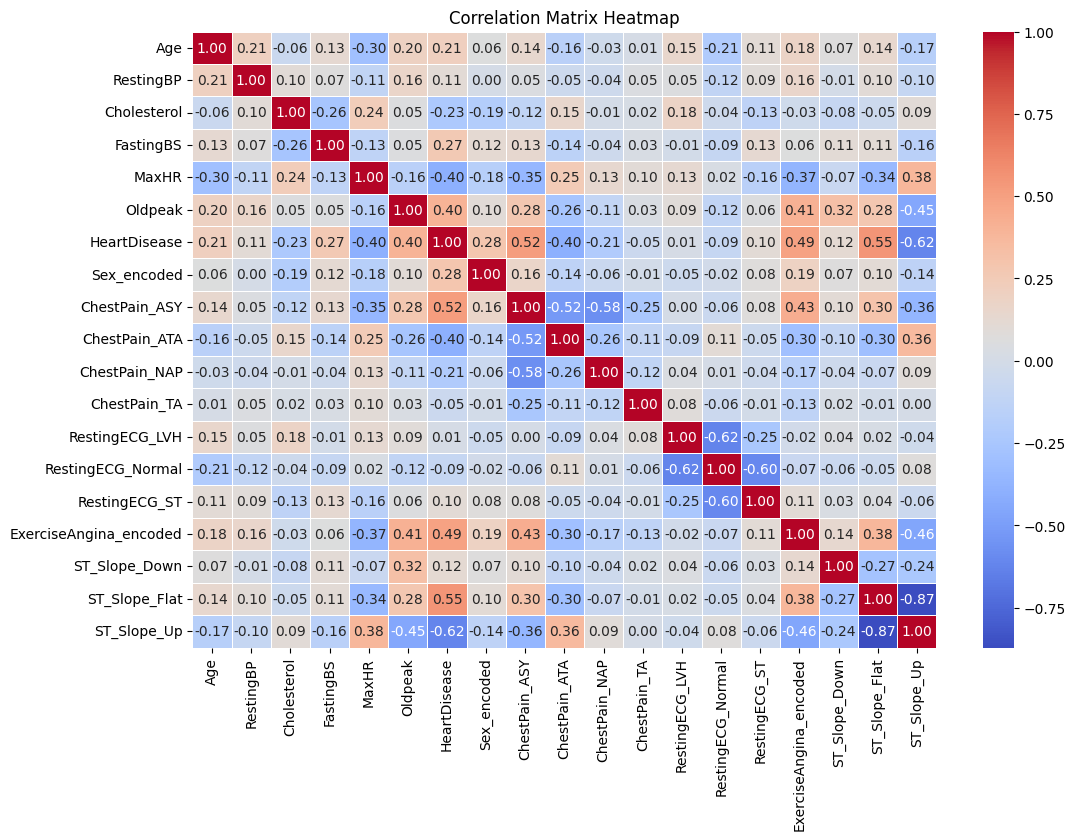

In [26]:
# Plot heatmap untuk visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_numeric, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
heart_data.isnull().sum()

Age                       7
RestingBP                 0
Cholesterol               0
FastingBS                 0
MaxHR                     0
Oldpeak                   0
HeartDisease              0
Sex_encoded               0
ChestPain_ASY             0
ChestPain_ATA             0
ChestPain_NAP             0
ChestPain_TA              0
RestingECG_LVH            0
RestingECG_Normal         0
RestingECG_ST             0
ExerciseAngina_encoded    0
ST_Slope_Down             0
ST_Slope_Flat             0
ST_Slope_Up               0
dtype: int64

In [28]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.802832,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.404139,0.068627,0.501089,0.430283
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.424589,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.252957,0.500271,0.495386
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
heart_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,NaN,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1
1,49.0,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,37.0,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,48.0,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,1,0,1,0
4,54.0,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [30]:
# Mengisi nilai-nilai yang hilang dengan mean dari setiap kolom dengan inplace=True
heart_data.fillna(heart_data.mean(), inplace=True)

In [31]:
heart_data.isnull().sum()

Age                       0
RestingBP                 0
Cholesterol               0
FastingBS                 0
MaxHR                     0
Oldpeak                   0
HeartDisease              0
Sex_encoded               0
ChestPain_ASY             0
ChestPain_ATA             0
ChestPain_NAP             0
ChestPain_TA              0
RestingECG_LVH            0
RestingECG_Normal         0
RestingECG_ST             0
ExerciseAngina_encoded    0
ST_Slope_Down             0
ST_Slope_Flat             0
ST_Slope_Up               0
dtype: int64

In [32]:
# Ubah kolom Age dari float menjadi int
heart_data['Age'] = heart_data['Age'].astype(int)

In [33]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     918 non-null    int64  
 1   RestingBP               918 non-null    int64  
 2   Cholesterol             918 non-null    int64  
 3   FastingBS               918 non-null    int64  
 4   MaxHR                   918 non-null    int64  
 5   Oldpeak                 918 non-null    float64
 6   HeartDisease            918 non-null    int64  
 7   Sex_encoded             918 non-null    int64  
 8   ChestPain_ASY           918 non-null    int64  
 9   ChestPain_ATA           918 non-null    int64  
 10  ChestPain_NAP           918 non-null    int64  
 11  ChestPain_TA            918 non-null    int64  
 12  RestingECG_LVH          918 non-null    int64  
 13  RestingECG_Normal       918 non-null    int64  
 14  RestingECG_ST           918 non-null    in

In [34]:
heart_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,54,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,0,0,0,1


## 2.8&nbsp; Disribution Plot of All Features

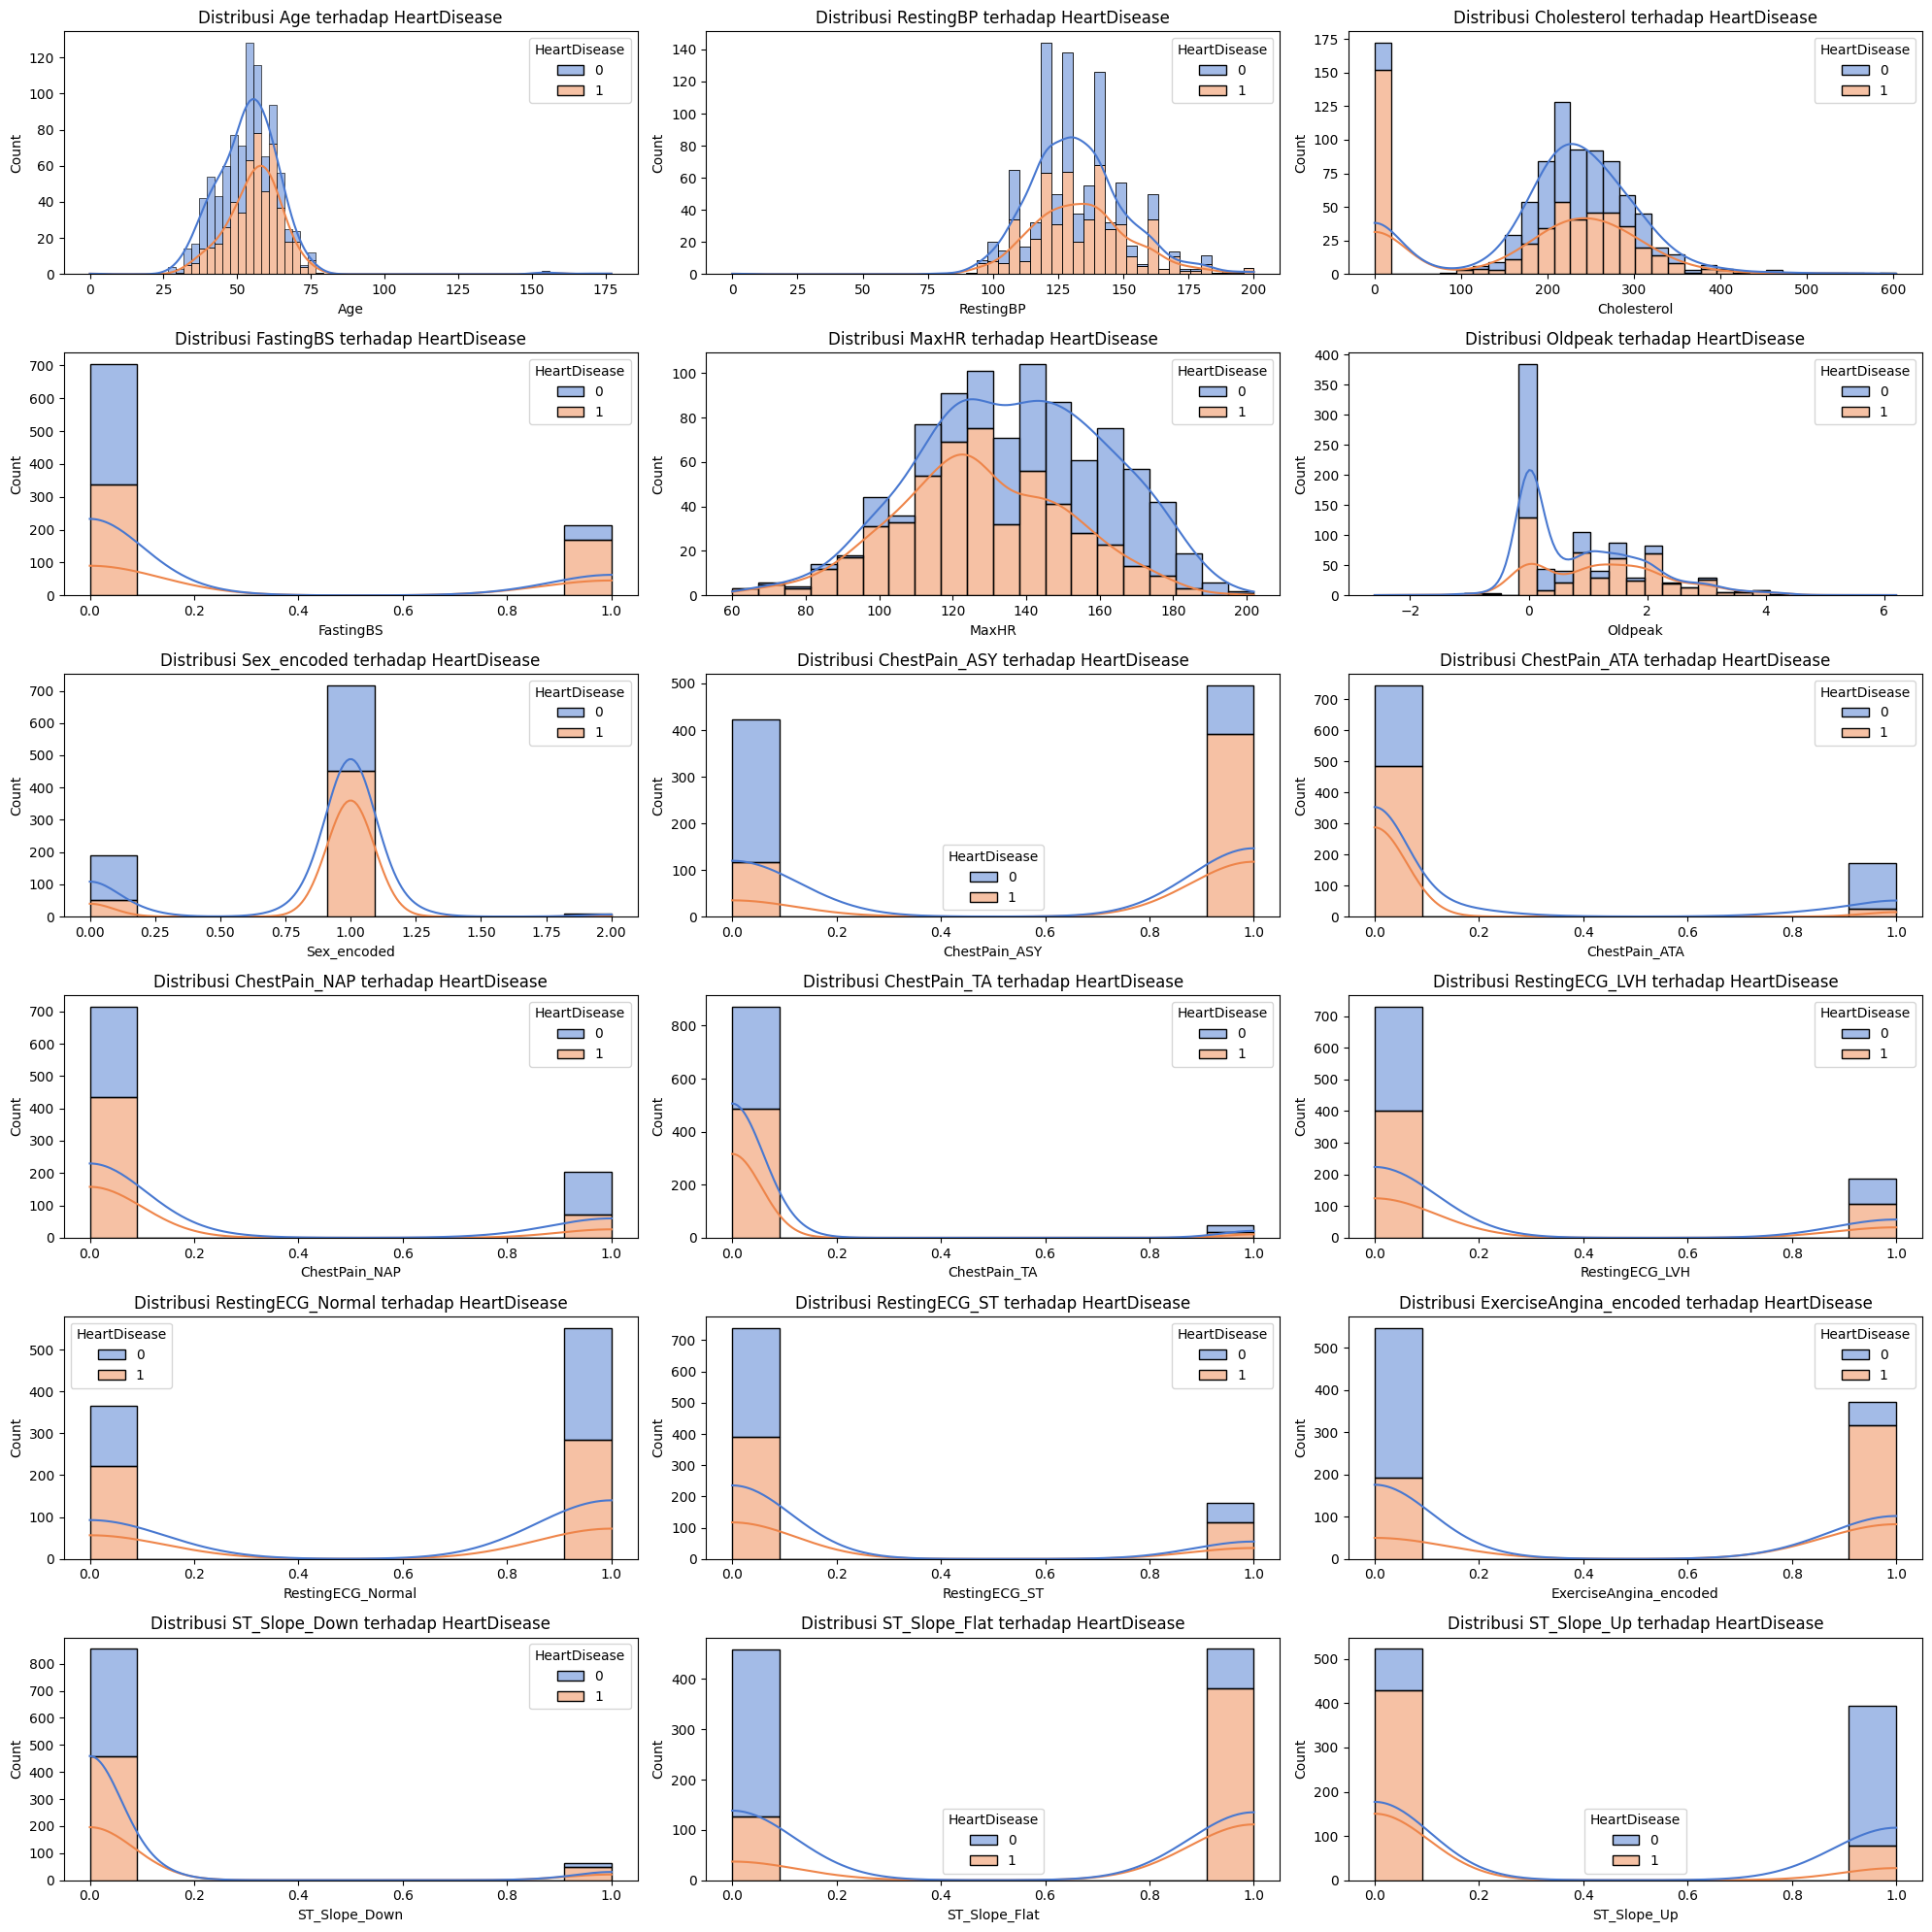

In [35]:
# Mengatur ukuran plot
plt.figure(figsize=(20, 20))

# Mendefinisikan jumlah baris dan kolom untuk subplot
rows = 6
cols = 3

# Daftar fitur yang akan digambar
features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
            'Oldpeak', 'Sex_encoded', 'ChestPain_ASY', 'ChestPain_ATA', 'ChestPain_NAP',
            'ChestPain_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
            'ExerciseAngina_encoded', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']

# Membuat subplot dan menggambar plot distribusi untuk setiap fitur
for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=heart_data, x=feature, hue='HeartDisease', kde=True, palette='muted', multiple='stack')
    plt.title(f'Distribusi {feature} terhadap HeartDisease')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [36]:
# checking the distribution of Target Variable
heart_data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

# 3&nbsp; Outliers Identify

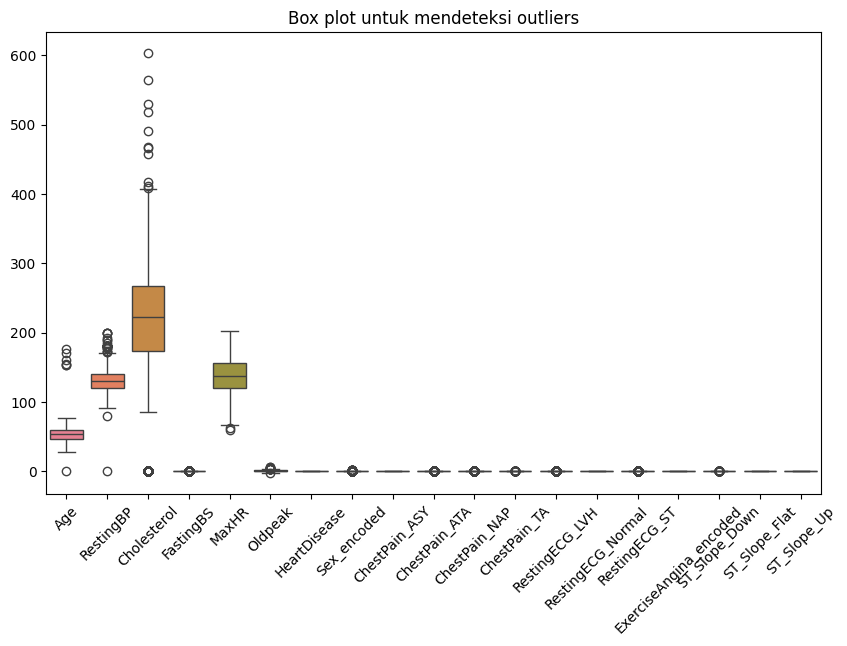

In [37]:
# Visualisasi dengan box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_data)
plt.title('Box plot untuk mendeteksi outliers')
plt.xticks(rotation=45)
plt.show()

## 3.1&nbsp; Outliers of Age

In [38]:
# Hitung Q1 dan Q3
Q1 = heart_data['Age'].quantile(0.25)
Q3 = heart_data['Age'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identifikasi outliers
outliers = heart_data[(heart_data['Age'] < lower_bound) | (heart_data['Age'] > upper_bound)]

# Tampilkan outliers
print("Outliers:")
outliers

Outliers:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
74,155,140,268,0,128,1.5,1,1,1,0,0,0,0,1,0,1,0,1,0
329,0,130,0,1,130,1.1,1,1,1,0,0,0,0,0,1,1,1,0,0
389,161,160,0,1,145,1.0,1,1,1,0,0,0,0,0,1,0,0,1,0
447,177,124,171,0,110,2.0,1,1,1,0,0,0,0,0,1,1,0,0,1
626,153,142,226,0,111,0.0,0,1,1,0,0,0,1,0,0,1,0,0,1
687,170,156,245,0,143,0.0,0,1,0,1,0,0,1,0,0,0,0,0,1
707,154,124,266,0,109,2.2,1,1,1,0,0,0,1,0,0,1,0,1,0


### 3.1.1&nbsp; Drop Outliers of Age

In [39]:
# Menghapus outliers dari DataFrame asli dengan inplace=True
heart_data.drop(heart_data[(heart_data['Age'] < lower_bound) | (heart_data['Age'] > upper_bound)].index, inplace=True)

# Menampilkan DataFrame tanpa outliers
heart_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,54,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,0,1,0,1,0,0,0,1,0
914,68,144,193,1,141,3.4,1,1,1,0,0,0,0,1,0,0,0,1,0
915,57,130,131,0,115,1.2,1,1,1,0,0,0,0,1,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0


### 3.1.2&nbsp; Boxplot Age After Adjust

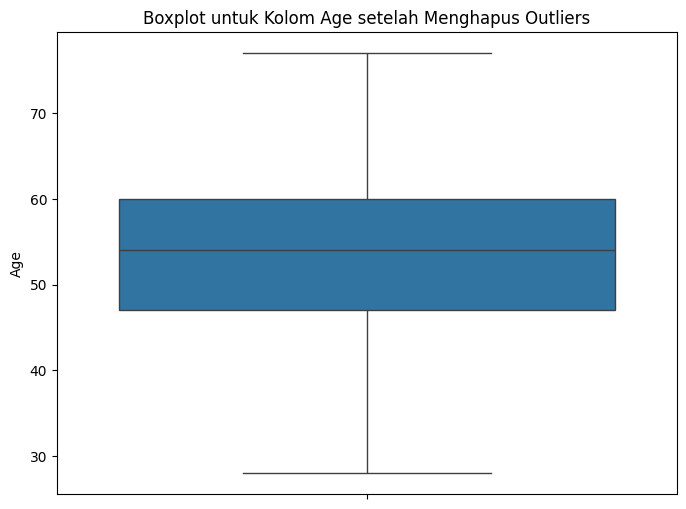

In [40]:
# Membuat boxplot untuk kolom 'Age' setelah menghapus outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart_data['Age'])
plt.title('Boxplot untuk Kolom Age setelah Menghapus Outliers')
plt.show()

## 3.2&nbsp; Outliers of RestingBP

In [41]:
# Hitung Q1 dan Q3
Q1 = heart_data['RestingBP'].quantile(0.25)
Q3 = heart_data['RestingBP'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identifikasi outliers_restingbp
outliers_restingbp = heart_data[(heart_data['RestingBP'] < lower_bound) | (heart_data['RestingBP'] > upper_bound)]

# Tampilkan outliers_restingbp
print("outliers_restingbp:")
outliers_restingbp

outliers_restingbp:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
109,39,190,241,0,106,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1
123,58,180,393,0,110,1.0,1,0,0,1,0,0,0,1,0,1,0,1,0
189,53,180,285,0,120,1.5,1,1,1,0,0,0,0,0,1,1,0,1,0
190,46,180,280,0,120,0.0,0,1,1,0,0,0,0,0,1,0,0,0,1
241,54,200,198,0,142,2.0,1,1,1,0,0,0,0,1,0,1,0,1,0
274,45,180,295,0,180,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1
275,59,180,213,0,100,0.0,0,1,0,0,1,0,0,1,0,0,0,0,1
278,57,180,347,0,126,0.8,0,0,1,0,0,0,0,0,1,1,0,1,0
314,53,80,0,0,141,2.0,0,1,1,0,0,0,0,1,0,1,1,0,0
365,64,200,0,0,140,1.0,1,0,1,0,0,0,0,1,0,1,0,1,0


### 3.2.1&nbsp; Adjust Outliers RestingBP with Mean

In [42]:
# Hitung Q1 dan Q3
Q1 = heart_data['RestingBP'].quantile(0.25)
Q3 = heart_data['RestingBP'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Hitung mean dari kolom 'RestingBP'
mean_restingbp = heart_data['RestingBP'].mean()

# Ganti nilai outliers dengan mean
heart_data['RestingBP'] = heart_data['RestingBP'].apply(
    lambda x: mean_restingbp if x < lower_bound or x > upper_bound else x
)

# Tampilkan hasil setelah mengganti outliers
print("Setelah mengganti outliers dengan mean:")
heart_data['RestingBP'].describe()

Setelah mengganti outliers dengan mean:


count    911.000000
mean     131.087365
std       15.595699
min       92.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: RestingBP, dtype: float64

### 3.2.2&nbsp; Boxplot RestingBP After Adjust

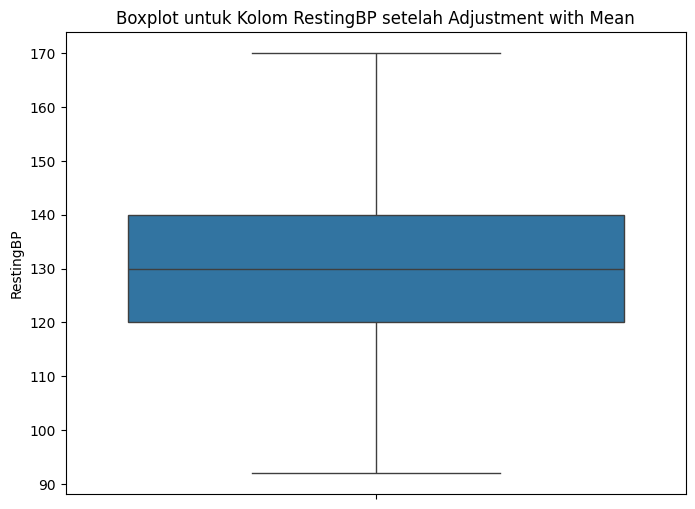

In [43]:
# Membuat boxplot untuk kolom 'RestingBP' setelah Adjustment with Mean
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart_data['RestingBP'])
plt.title('Boxplot untuk Kolom RestingBP setelah Adjustment with Mean')
plt.show()

## 3.3 Outliers of Cholesterol

In [44]:
# Hitung Q1 dan Q3
Q1 = heart_data['Cholesterol'].quantile(0.25)
Q3 = heart_data['Cholesterol'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identifikasi outliers_Cholesterol
outliers_Cholesterol = heart_data[(heart_data['Cholesterol'] < lower_bound) | (heart_data['Cholesterol'] > upper_bound)]

# Tampilkan outliers_Cholesterol
print("outliers_Cholesterol:")
outliers_Cholesterol

outliers_Cholesterol:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
28,53,113.0,468,0,127,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1
30,53,145.0,518,0,130,0.0,1,1,0,0,1,0,0,1,0,0,0,1,0
69,44,150.0,412,0,170,0.0,0,1,1,0,0,0,0,1,0,0,0,0,1
76,32,118.0,529,0,130,0.0,1,1,1,0,0,0,0,1,0,0,0,1,0
103,40,120.0,466,1,152,1.0,1,1,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,62,133.0,0,1,119,1.2,1,1,0,0,1,0,0,0,1,1,0,1,0
616,67,115.0,564,0,160,1.6,0,0,0,0,1,0,1,0,0,0,0,1,0
624,63,150.0,407,0,154,4.0,1,0,1,0,0,0,1,0,0,0,0,1,0
667,65,140.0,417,1,157,0.8,0,0,0,0,1,0,1,0,0,0,0,0,1


In [45]:
outliers_Cholesterol.count()

Age                       182
RestingBP                 182
Cholesterol               182
FastingBS                 182
MaxHR                     182
Oldpeak                   182
HeartDisease              182
Sex_encoded               182
ChestPain_ASY             182
ChestPain_ATA             182
ChestPain_NAP             182
ChestPain_TA              182
RestingECG_LVH            182
RestingECG_Normal         182
RestingECG_ST             182
ExerciseAngina_encoded    182
ST_Slope_Down             182
ST_Slope_Flat             182
ST_Slope_Up               182
dtype: int64

In [48]:
# Hitung Q1 dan Q3
Q1 = heart_data['Cholesterol'].quantile(0.25)
Q3 = heart_data['Cholesterol'].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identifikasi outliers_chol
outliers_chol = heart_data[(heart_data['Cholesterol'] < lower_bound) | (heart_data['Cholesterol'] > upper_bound)]

# Tampilkan outliers_chol
print("Outliers_chol:")
outliers_chol

Outliers_chol:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
78,52,140.000000,100,0,138,0.0,0,1,0,1,0,0,0,1,0,1,0,0,1
98,56,120.000000,85,0,140,0.0,0,1,1,0,0,0,0,1,0,0,0,0,1
102,40,150.000000,392,0,130,2.0,1,0,1,0,0,0,0,1,0,0,0,1,0
123,58,132.342481,393,0,110,1.0,1,0,0,1,0,0,0,1,0,1,0,1,0
132,54,170.000000,388,0,122,2.0,1,1,1,0,0,0,0,0,1,1,0,1,0
182,52,140.000000,404,0,124,2.0,1,1,1,0,0,0,0,1,0,1,0,1,0
256,55,130.000000,394,0,150,0.0,0,0,0,1,0,0,1,0,0,0,0,0,1
444,56,120.000000,100,0,120,1.5,1,1,1,0,0,0,0,1,0,1,0,1,0
498,67,160.000000,384,1,130,0.0,1,1,1,0,0,0,0,0,1,1,0,1,0
613,58,140.000000,385,1,135,0.3,0,1,1,0,0,0,1,0,0,0,0,0,1


### 3.3.1 Drop Outliers of Cholesterol

In [49]:
# Menghapus outliers dari DataFrame asli dengan inplace=True
heart_data.drop(heart_data[(heart_data['Cholesterol'] < lower_bound) | (heart_data['Cholesterol'] > upper_bound)].index, inplace=True)

# Menampilkan DataFrame tanpa outliers
heart_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,54,140.0,289,0,172,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1
1,49,160.0,180,0,156,1.0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,37,130.0,283,0,98,0.0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,48,138.0,214,0,108,1.5,1,0,1,0,0,0,0,1,0,1,0,1,0
4,54,150.0,195,0,122,0.0,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264,0,132,1.2,1,1,0,0,0,1,0,1,0,0,0,1,0
914,68,144.0,193,1,141,3.4,1,1,1,0,0,0,0,1,0,0,0,1,0
915,57,130.0,131,0,115,1.2,1,1,1,0,0,0,0,1,0,1,0,1,0
916,57,130.0,236,0,174,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0


### 3.3.2&nbsp; Boxplot Cholesterol After Adjust

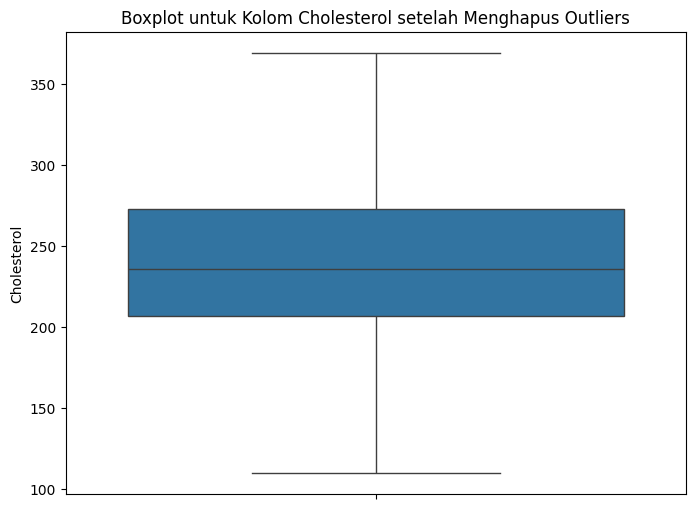

In [50]:
# Membuat boxplot untuk kolom 'Cholesterol' setelah menghapus outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart_data['Cholesterol'])
plt.title('Boxplot untuk Kolom Cholesterol setelah Menghapus Outliers')
plt.show()

## 3.4&nbsp; Recheck of Outliers All (Hist)

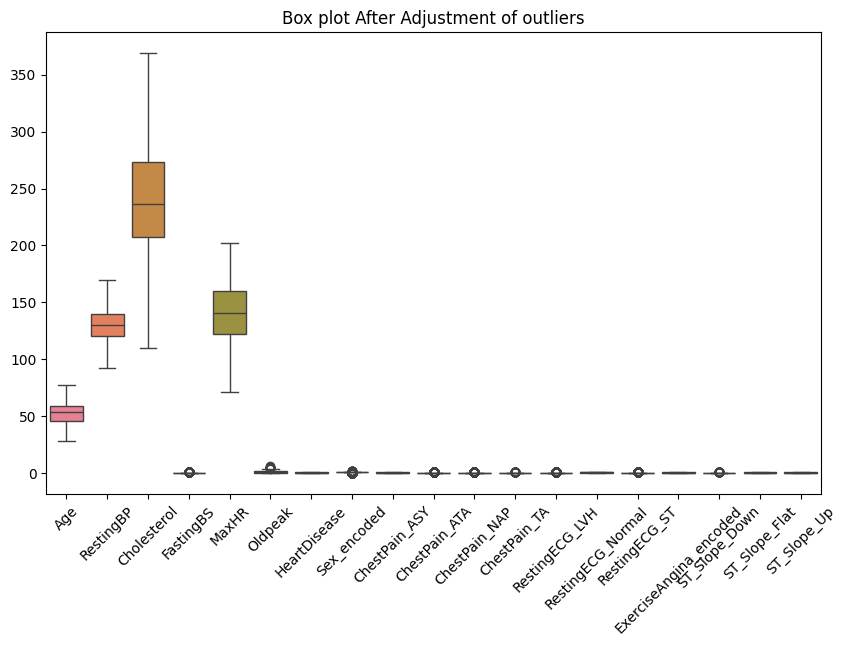

In [51]:
# Visualisasi dengan box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_data)
plt.title('Box plot After Adjustment of outliers')
plt.xticks(rotation=45)
plt.show()

In [52]:
# checking the distribution of Target Variable
heart_data['HeartDisease'].value_counts()

HeartDisease
0    378
1    340
Name: count, dtype: int64

In [53]:
heart_data.shape

(718, 19)

In [54]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     718 non-null    int64  
 1   RestingBP               718 non-null    float64
 2   Cholesterol             718 non-null    int64  
 3   FastingBS               718 non-null    int64  
 4   MaxHR                   718 non-null    int64  
 5   Oldpeak                 718 non-null    float64
 6   HeartDisease            718 non-null    int64  
 7   Sex_encoded             718 non-null    int64  
 8   ChestPain_ASY           718 non-null    int64  
 9   ChestPain_ATA           718 non-null    int64  
 10  ChestPain_NAP           718 non-null    int64  
 11  ChestPain_TA            718 non-null    int64  
 12  RestingECG_LVH          718 non-null    int64  
 13  RestingECG_Normal       718 non-null    int64  
 14  RestingECG_ST           718 non-null    int64  

In [55]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_encoded,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_encoded,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,52.791086,131.511848,239.778552,0.165738,140.519499,0.899164,0.473538,0.772981,0.487465,0.224234,0.231198,0.057103,0.231198,0.598886,0.169916,0.381616,0.058496,0.469359,0.472145
std,9.469960,15.191485,47.828462,0.372105,24.627468,1.075763,0.499647,0.445019,0.500191,0.417368,0.421892,0.232201,0.421892,0.490466,0.375821,0.486122,0.234842,0.499408,0.499571
min,28.000000,92.000000,110.000000,0.000000,71.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,207.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,236.000000,0.000000,140.500000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,140.000000,273.000000,0.000000,160.000000,1.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,170.000000,369.000000,1.000000,202.000000,6.200000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# Menghapus nilai yang tidak masuk akal secara in-place
heart_data.drop(heart_data[(heart_data['Age'] <= 0) |
                                             (heart_data['RestingBP'] <= 0) |
                                             (heart_data['Cholesterol'] <= 0)].index, inplace=True)

In [57]:
heart_data.drop_duplicates(inplace=True)

In [58]:
# Menghapus baris yang mengandung nilai yang hilang
heart_data.dropna(inplace=True)

In [59]:
# Verifikasi label untuk memastikan tidak ada kesalahan
print(heart_data.groupby('HeartDisease').size())

HeartDisease
0    378
1    340
dtype: int64


In [60]:
# Menghitung statistik label
label_counts = heart_data['HeartDisease'].value_counts()
label_percentages = heart_data['HeartDisease'].value_counts(normalize=True) * 100

# Menampilkan statistik
print(f"Jumlah total data: {len(heart_data)}")
print(f"Jumlah data untuk kelas '0' (Tidak menderita penyakit jantung): {label_counts[0]}")
print(f"Jumlah data untuk kelas '1' (Menderita penyakit jantung): {label_counts[1]}")
print(f"Persentase data untuk kelas '0': {label_percentages[0]:.2f}%")
print(f"Persentase data untuk kelas '1': {label_percentages[1]:.2f}%")

# Dokumentasi statistik hasil pelabelan
with open('labeling_statistics.txt', 'w') as f:
    f.write(f"Jumlah total data: {len(heart_data)}\n")
    f.write(f"Jumlah data untuk kelas '0' (Tidak menderita penyakit jantung): {label_counts[0]}\n")
    f.write(f"Jumlah data untuk kelas '1' (Menderita penyakit jantung): {label_counts[1]}\n")
    f.write(f"Persentase data untuk kelas '0': {label_percentages[0]:.2f}%\n")
    f.write(f"Persentase data untuk kelas '1': {label_percentages[1]:.2f}%\n")

Jumlah total data: 718
Jumlah data untuk kelas '0' (Tidak menderita penyakit jantung): 378
Jumlah data untuk kelas '1' (Menderita penyakit jantung): 340
Persentase data untuk kelas '0': 52.65%
Persentase data untuk kelas '1': 47.35%


# 4.&nbsp;Data Preparation for Modelling

## 4.1&nbsp; Train-Test Split

In [61]:
# Pisahkan fitur dan target
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

In [62]:
# Lakukan train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2&nbsp; Scaling

In [63]:
# Buat pipeline dengan preprocessing
pipeline = Pipeline([
    ('quantile_transform', QuantileTransformer(output_distribution='normal')),
    ('scaler', StandardScaler())  # Scaling fitur
])

## 4.3&nbsp; PreProcess Data train & test

In [64]:
pipeline.fit(X_train)
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (574). n_quantiles is set to n_samples.
  warnings.warn(


# 5.&nbsp; Modelling

## 5.1.&nbsp; Decision Tree

In [65]:
# Modeling dengan Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_transformed, y_train)

# Prediksi dengan Decision Tree
y_pred_dt = dt_model.predict(X_test_transformed)

# Menampilkan laporan klasifikasi dan akurasi
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt, digits=2))
print("Accuracy score of Decision Tree Classifier: ", accuracy_score(y_test, y_pred_dt))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.83      0.79      0.81        67

    accuracy                           0.83       144
   macro avg       0.83      0.82      0.82       144
weighted avg       0.83      0.83      0.83       144

Accuracy score of Decision Tree Classifier:  0.8263888888888888


### 5.1.1&nbsp; Decision Tree with HyperParams

In [66]:
# Definisikan parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Buat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Buat GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Latih model dengan GridSearchCV
grid_search.fit(X_train_transformed, y_train)

# Prediksi dengan model terbaik dari hasil GridSearchCV
best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_transformed)

# Menampilkan laporan klasifikasi dan akurasi
print("Tuned Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt, digits=2))
print("Accuracy score of Tuned Decision Tree Classifier: ", accuracy_score(y_test, y_pred_dt))

# Menampilkan hyperparameter terbaik
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Tuned Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        77
           1       0.87      0.79      0.83        67

    accuracy                           0.85       144
   macro avg       0.85      0.84      0.85       144
weighted avg       0.85      0.85      0.85       144

Accuracy score of Tuned Decision Tree Classifier:  0.8472222222222222
Best hyperparameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


### 5.1.2&nbsp; Evaluation of Tolerance

In [67]:
# Parameter grid untuk Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Buat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Buat GridSearchCV untuk Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Latih model dengan GridSearchCV
grid_search_dt.fit(X_train_transformed, y_train)

# Prediksi dengan model terbaik dari hasil GridSearchCV
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_transformed)

# Menampilkan laporan klasifikasi dan akurasi
print("Tuned Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt, digits=2))
print("Accuracy score of Tuned Decision Tree Classifier: ", accuracy_score(y_test, y_pred_dt))

# Menampilkan hyperparameter terbaik
print("Best hyperparameters found by GridSearchCV for Decision Tree:")
print(grid_search_dt.best_params_)

# Evaluasi berdasarkan metrik tambahan
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Cetak metrik evaluasi
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")

# Evaluasi berdasarkan toleransi yang ditetapkan
tolerance = {
    'accuracy': 0.80,
    'precision': 0.75,
    'recall': 0.85,
    'f1': 0.80,
}

evaluation_results_dt = {
    'accuracy': accuracy_dt >= tolerance['accuracy'],
    'precision': precision_dt >= tolerance['precision'],
    'recall': recall_dt >= tolerance['recall'],
    'f1': f1_dt >= tolerance['f1'],
}

print("\nEvaluation Results Based on Tolerance (Decision Tree):")
for metric, result in evaluation_results_dt.items():
    print(f"{metric.capitalize()}: {'Pass' if result else 'Fail'}")

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Tuned Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        77
           1       0.87      0.79      0.83        67

    accuracy                           0.85       144
   macro avg       0.85      0.84      0.85       144
weighted avg       0.85      0.85      0.85       144

Accuracy score of Tuned Decision Tree Classifier:  0.8472222222222222
Best hyperparameters found by GridSearchCV for Decision Tree:
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy: 0.85
Precision: 0.87
Recall: 0.79
F1 Score: 0.83

Evaluation Results Based on Tolerance (Decision Tree):
Accuracy: Pass
Precision: Pass
Recall: Fail
F1: Pass


## 5.2&nbsp; XGBoost

In [68]:
# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Latih model pada data latih yang telah ditransformasi
xgb_model.fit(X_train_transformed, y_train)

# Prediksi pada data uji yang telah ditransformasi
y_pred_xgb = xgb_model.predict(X_test_transformed)

# Menampilkan laporan klasifikasi dan akurasi
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb, digits=2))
print("Accuracy score of XGBoost Classifier: ", accuracy_score(y_test, y_pred_xgb))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        77
           1       0.89      0.84      0.86        67

    accuracy                           0.88       144
   macro avg       0.88      0.87      0.87       144
weighted avg       0.88      0.88      0.87       144

Accuracy score of XGBoost Classifier:  0.875


### 5.2.1&nbsp; XGBoost with HyperParams

In [69]:
'''# Inisialisasi model XGBoost dengan tuning sederhana
xgb_model = XGBClassifier(
    max_depth=3,  # Penyesuaian sederhana untuk kedalaman maksimum pohon
    learning_rate=0.2,  # Penyesuaian sederhana untuk laju pembelajaran
    n_estimators=100,  # Penyesuaian sederhana untuk jumlah estimator
    random_state=42
)

# Latih model pada data latih yang telah ditransformasi
xgb_model.fit(X_train_transformed, y_train)

# Prediksi pada data uji yang telah ditransformasi
y_pred_xgb = xgb_model.predict(X_test_transformed)

# Menampilkan laporan klasifikasi dan akurasi menggunakan metrik dari XGBoost
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb, digits=2))
print("Accuracy score of XGBoost Classifier: ", accuracy_score(y_test, y_pred_xgb))'''

'# Inisialisasi model XGBoost dengan tuning sederhana\nxgb_model = XGBClassifier(\n    max_depth=3,  # Penyesuaian sederhana untuk kedalaman maksimum pohon\n    learning_rate=0.2,  # Penyesuaian sederhana untuk laju pembelajaran\n    n_estimators=100,  # Penyesuaian sederhana untuk jumlah estimator\n    random_state=42\n)\n\n# Latih model pada data latih yang telah ditransformasi\nxgb_model.fit(X_train_transformed, y_train)\n\n# Prediksi pada data uji yang telah ditransformasi\ny_pred_xgb = xgb_model.predict(X_test_transformed)\n\n# Menampilkan laporan klasifikasi dan akurasi menggunakan metrik dari XGBoost\nprint("XGBoost Classifier:")\nprint(classification_report(y_test, y_pred_xgb, digits=2))\nprint("Accuracy score of XGBoost Classifier: ", accuracy_score(y_test, y_pred_xgb))'

In [70]:
''' # Definisikan parameter grid untuk XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Buat model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Buat GridSearchCV untuk XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Latih model dengan GridSearchCV
grid_search_xgb.fit(X_train_transformed, y_train)

# Prediksi dengan model terbaik dari hasil GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_transformed)

# Menampilkan laporan klasifikasi dan akurasi
print("Tuned XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb, digits=2))
print("Accuracy score of Tuned XGBoost Classifier: ", accuracy_score(y_test, y_pred_xgb))

# Menampilkan hyperparameter terbaik
print("Best hyperparameters found by GridSearchCV:")
print(grid_search_xgb.best_params_) '''

' # Definisikan parameter grid untuk XGBoost\nparam_grid_xgb = {\n    \'learning_rate\': [0.01, 0.1, 0.3],\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [3, 6, 9],\n    \'min_child_weight\': [1, 3, 5],\n    \'subsample\': [0.8, 1.0],\n    \'colsample_bytree\': [0.8, 1.0],\n    \'gamma\': [0, 0.1, 0.2],\n    \'reg_alpha\': [0, 0.1, 1],\n    \'reg_lambda\': [1, 1.5, 2]\n}\n\n# Buat model XGBoost\nxgb_model = xgb.XGBClassifier(random_state=42)\n\n# Buat GridSearchCV untuk XGBoost\ngrid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring=\'accuracy\')\n\n# Latih model dengan GridSearchCV\ngrid_search_xgb.fit(X_train_transformed, y_train)\n\n# Prediksi dengan model terbaik dari hasil GridSearchCV\nbest_xgb_model = grid_search_xgb.best_estimator_\ny_pred_xgb = best_xgb_model.predict(X_test_transformed)\n\n# Menampilkan laporan klasifikasi dan akurasi\nprint("Tuned XGBoost Classifier:")\nprint(classification_report(y_test

In [71]:
# Inisialisasi model XGBoost dengan beberapa kombinasi hyperparameter yang berbeda
xgb_model = xgb.XGBClassifier(booster='gblinear',
                              max_depth=5,
                              learning_rate=0.1,
                              n_estimators=100,
                              min_child_weight=1,
                              subsample=1.0,
                              colsample_bytree=1.0,
                              gamma=0,
                              reg_alpha=0,
                              reg_lambda=1,
                              random_state=42)

# Latih model pada data latih yang telah ditransformasi
xgb_model.fit(X_train_transformed, y_train)

# Prediksi pada data uji yang telah ditransformasi
y_pred_xgb = xgb_model.predict(X_test_transformed)

# Menampilkan laporan klasifikasi dan akurasi menggunakan metrik dari XGBoost
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb, digits=2))
print("Accuracy score of XGBoost Classifier: ", accuracy_score(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:17:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        77
           1       0.92      0.88      0.90        67

    accuracy                           0.91       144
   macro avg       0.91      0.91      0.91       144
weighted avg       0.91      0.91      0.91       144

Accuracy score of XGBoost Classifier:  0.9097222222222222


### 5.2.2&nbsp; Evaluation Tolerance of XGB

In [72]:
# Inisialisasi model XGBoost dengan beberapa kombinasi hyperparameter yang berbeda
xgb_model = XGBClassifier(
    booster='gblinear',
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Latih model pada data latih yang telah ditransformasi
xgb_model.fit(X_train_transformed, y_train)

# Prediksi pada data uji yang telah ditransformasi
y_pred_xgb = xgb_model.predict(X_test_transformed)

# Menampilkan laporan klasifikasi dan akurasi menggunakan metrik dari XGBoost
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb, digits=2))
print("Accuracy score of XGBoost Classifier: ", accuracy_score(y_test, y_pred_xgb))

# Evaluasi berdasarkan metrik tambahan
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Cetak metrik evaluasi
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")

# Evaluasi berdasarkan toleransi yang ditetapkan
tolerance = {
    'accuracy': 0.80,
    'precision': 0.75,
    'recall': 0.85,
    'f1': 0.80,
}

evaluation_results_xgb = {
    'accuracy': accuracy_xgb >= tolerance['accuracy'],
    'precision': precision_xgb >= tolerance['precision'],
    'recall': recall_xgb >= tolerance['recall'],
    'f1': f1_xgb >= tolerance['f1'],
}

print("\nEvaluation Results Based on Tolerance (XGBoost):")
for metric, result in evaluation_results_xgb.items():
    print(f"{metric.capitalize()}: {'Pass' if result else 'Fail'}")

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        77
           1       0.92      0.88      0.90        67

    accuracy                           0.91       144
   macro avg       0.91      0.91      0.91       144
weighted avg       0.91      0.91      0.91       144

Accuracy score of XGBoost Classifier:  0.9097222222222222
Accuracy: 0.91
Precision: 0.92
Recall: 0.88
F1 Score: 0.90

Evaluation Results Based on Tolerance (XGBoost):
Accuracy: Pass
Precision: Pass
Recall: Pass
F1: Pass


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:17:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


## 5.3&nbsp; Fuction of Confussion Matrix

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## 5.4&nbsp; Confussion Matrix

Confusion matrix, without normalization
Decision Tree Classifier:
True Negatives:  53
False Positives:  8
False Negatives:  14
True Positives:  69

Confusion matrix, without normalization
XGBoost Classifier:
True Negatives:  59
False Positives:  5
False Negatives:  8
True Positives:  72


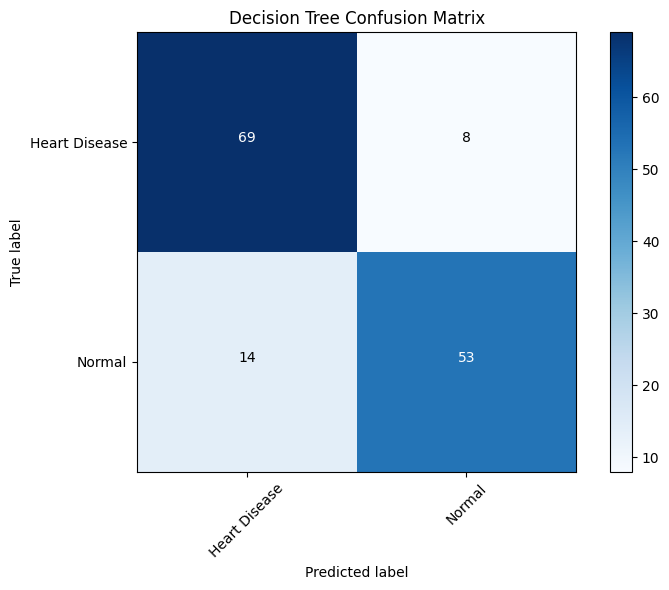

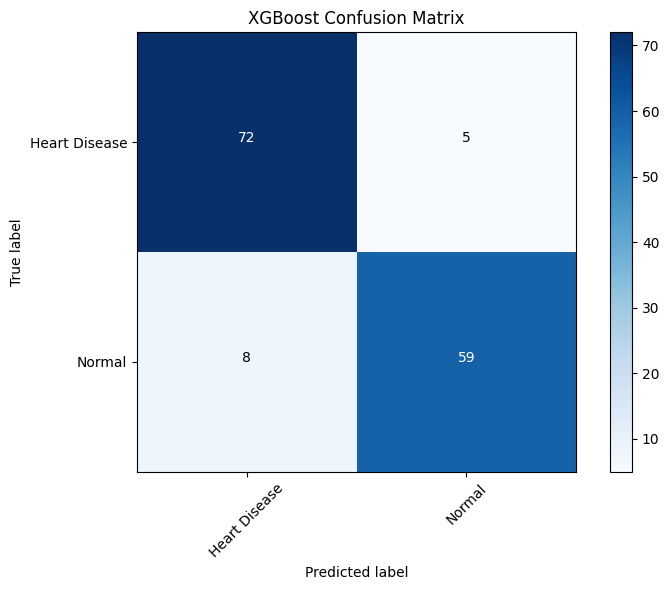

In [79]:
# Hitung confusion matrix untuk Decision Tree
cfm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix untuk Decision Tree
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cfm_dt, classes=['Heart Disease', 'Normal'], title='Decision Tree Confusion Matrix')

# Hitung nilai TN, FP, FN, TP untuk Decision Tree
tn_dt, fp_dt, fn_dt, tp_dt = cfm_dt.ravel()
print("Decision Tree Classifier:")
print("True Negatives: ", tp_dt)
print("False Positives: ", fp_dt)
print("False Negatives: ", fn_dt)
print("True Positives: ", tn_dt)
print()

# Hitung confusion matrix untuk XGBoost
cfm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix untuk XGBoost
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cfm_xgb, classes=['Heart Disease', 'Normal'], title='XGBoost Confusion Matrix')

# Hitung nilai TN, FP, FN, TP untuk XGBoost
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cfm_xgb.ravel()
print("XGBoost Classifier:")
print("True Negatives: ", tp_xgb)
print("False Positives: ", fp_xgb)
print("False Negatives: ", fn_xgb)
print("True Positives: ", tn_xgb)

## 5.5&nbsp; Best Model

In [75]:
# Hitung akurasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Hitung akurasi model XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Bandingkan akurasi kedua model
print("Accuracy of Decision Tree: ", accuracy_dt)
print("Accuracy of XGBoost: ", accuracy_xgb)

# Tentukan model terbaik berdasarkan akurasi
best_model = "Decision Tree" if accuracy_dt > accuracy_xgb else "XGBoost"
print("Best model: ", best_model)

Accuracy of Decision Tree:  0.8472222222222222
Accuracy of XGBoost:  0.9097222222222222
Best model:  XGBoost


## 5.6&nbsp; Feature Importance

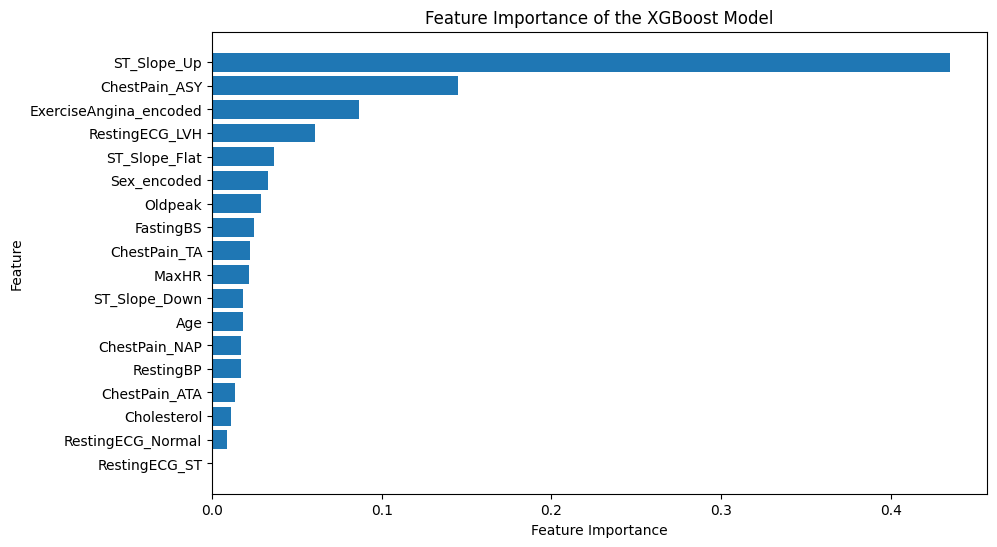

In [ ]:
# Jika model terbaik adalah Decision Tree
if best_model == "Decision Tree":
    feature_importances = dt_model.feature_importances_
    feature_names = X_train.columns
    model_name = "Decision Tree"

# Jika model terbaik adalah XGBoost
else:
    feature_importances = xgb_model.feature_importances_
    feature_names = X_train.columns
    model_name = "XGBoost"

# Mengurutkan fitur berdasarkan pentingnya
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Menampilkan fitur penting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Feature Importance of the {model_name} Model')
plt.gca().invert_yaxis()  # Mengurutkan fitur dari paling penting ke paling tidak penting
plt.show()